In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [75]:
def automaton(size=10, pattern='01011010'):
    # creates empty array
    pattern_list = []
    
    # creates first line (dict)
    row = np.zeros(size)
    row[int(size/2)] = 1

    dict1 = dict( (a, row[a]) for a in range(len(row)))
    pattern_list.append(dict1)

    # loop for each row
    for i in range(1, int(size/2)):
        row1 = row.copy()

        row[0] = 0
        row[-1] = 0

        # loop for each column
        for j in range(1, size-1):
            # fill the line based on the pattern
            action = row1[j-1]*4+row1[j]*2+row1[j+1]

            if action == 0:
                row[j] = pattern[7]
            elif action == 1:
                row[j] = pattern[6]
            elif action == 2:
                row[j] = pattern[5]
            elif action == 3:
                row[j] = pattern[4]
            elif action == 4:
                row[j] = pattern[3]
            elif action == 5:
                row[j] = pattern[2]
            elif action == 6:
                row[j] = pattern[1]
            elif action == 7:
                row[j] = pattern[0]

        # appends row to the array
        dict1 = dict( (a, row[a]) for a in range(len(row)))
        pattern_list.append(dict1)

    # transforms array in df
    df_pattern = pd.DataFrame(pattern_list, columns=range(size))
    
    return df_pattern


## Pattern input

Change the size, grows exponentially. Good size is 10 or 11. Behave.

Change the pattern as a string with 8 characters 0 or 1 in the binary form presented here:

https://en.wikipedia.org/wiki/Elementary_cellular_automaton

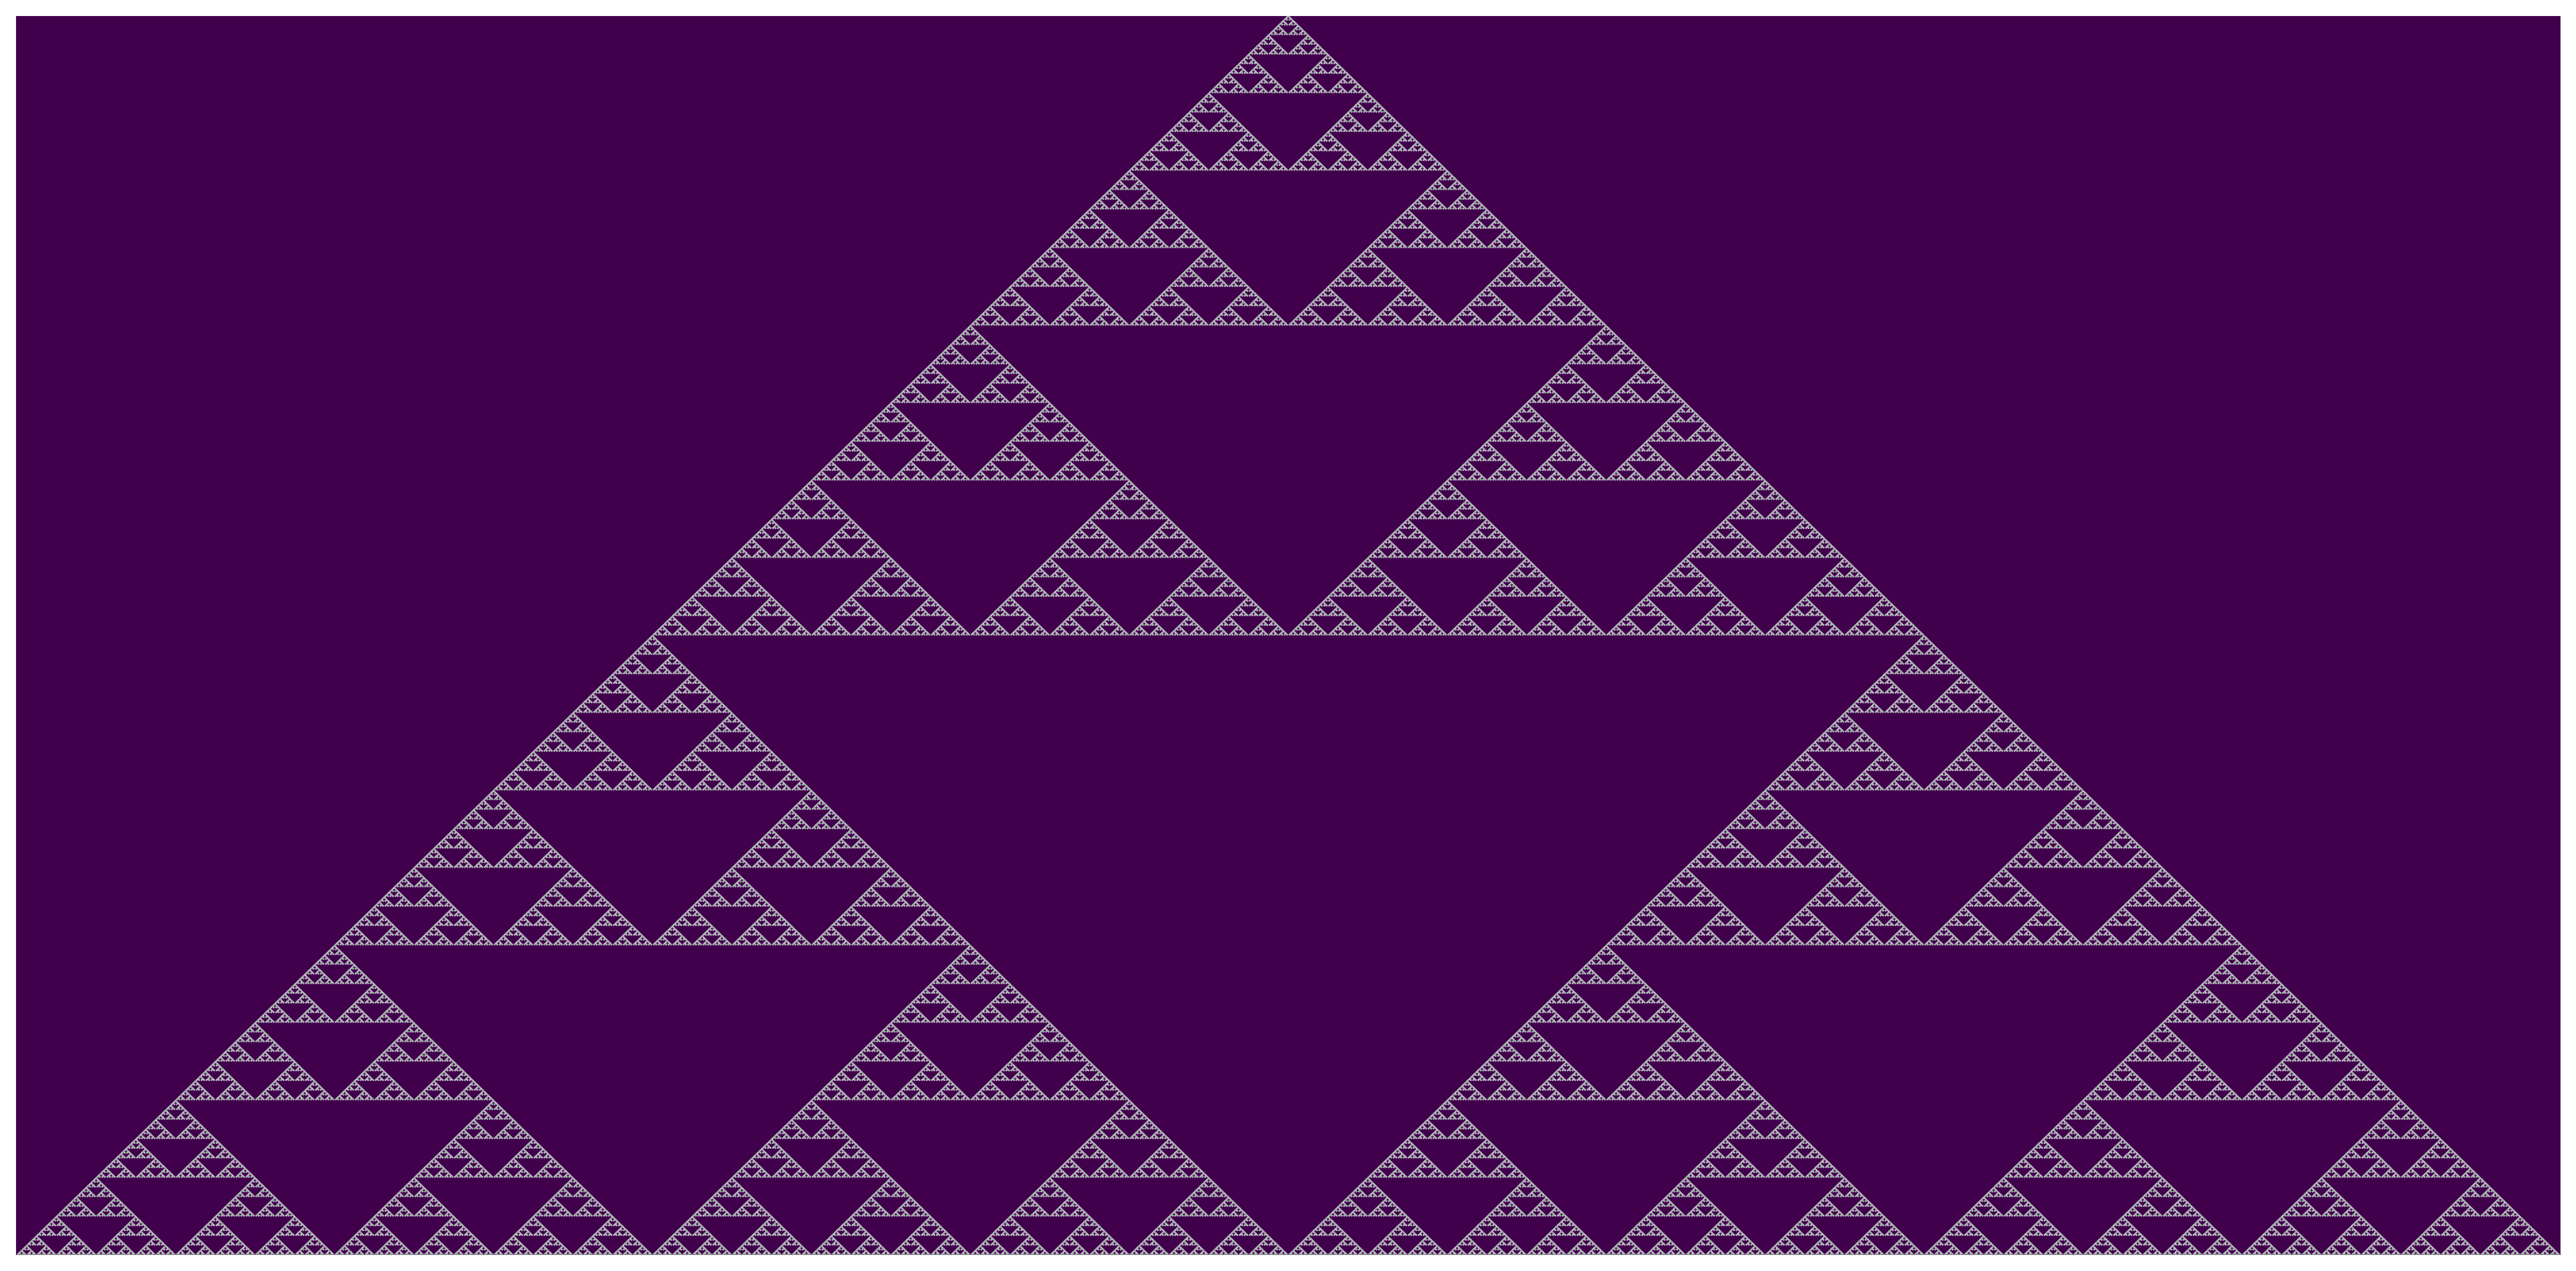

In [79]:
# set the size of the image
size = 11
pattern='00010010'

if len(pattern) != 8:
    raise NameError('Pattern Should be a 8 digit binary number')

pattern = automaton(2**size+1)

# prints
plt.figure(figsize=(2**size/100, 2**size/200), dpi=300)
plt.imshow(pattern, cmap='PRGn', aspect='auto')
plt.axis('off')

plt.savefig("automaton.svg", bbox_inches='tight',pad_inches=0)